<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_17_Prever_se_os_clientes_deixar%C3%A3o_a_empresa_nos_pr%C3%B3ximos_2_anos_csv_Implementa%C3%A7%C3%A3o_Modelo_de_ML_com_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Diabetes
# Machine Learning - Aula 17 - Modelos Supervisionados - Naive Bayes (Teoria Geral da Probabilidade)
# Gerando Modelo de Machine Learning (classificação)
# Domínio: 
# O departamento de RH de uma empresa deseja prever se alguns clientes deixarão a empresa nos próximos 2 anos. Seu trabalho é construir um modelo preditivo que preveja as perspectivas do funcionário futuro e presente.

In [47]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [48]:
# Estrutura Inicial para um Projeto de Machine Learning.
from IPython.display import Image
Image('Workflow.png')

In [49]:
# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

df_empregados = pd.read_csv("Employee.csv")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# df_empregados=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/Employee.csv')


#Carrega o dataset com os dados para o treinamento e validacao
# df_empregados = pd.read_csv("Employee.csv", encoding="utf-8")

In [51]:
df_empregados.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [52]:
df_empregados.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [53]:
# Verificando o formato dos dados
df_empregados.shape

(4653, 9)

In [54]:
# Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_empregados[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']])

# Definição do atributo de classificacao
data_classif = np.array(df_empregados['LeaveOrNot'])

In [55]:
# Verificando as primeiras linhas do dataset
df_empregados.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [56]:
# Verificando as ultimas linhas do dataset
df_empregados.tail(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [57]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_empregados, size=35):
    corr = df_empregados.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

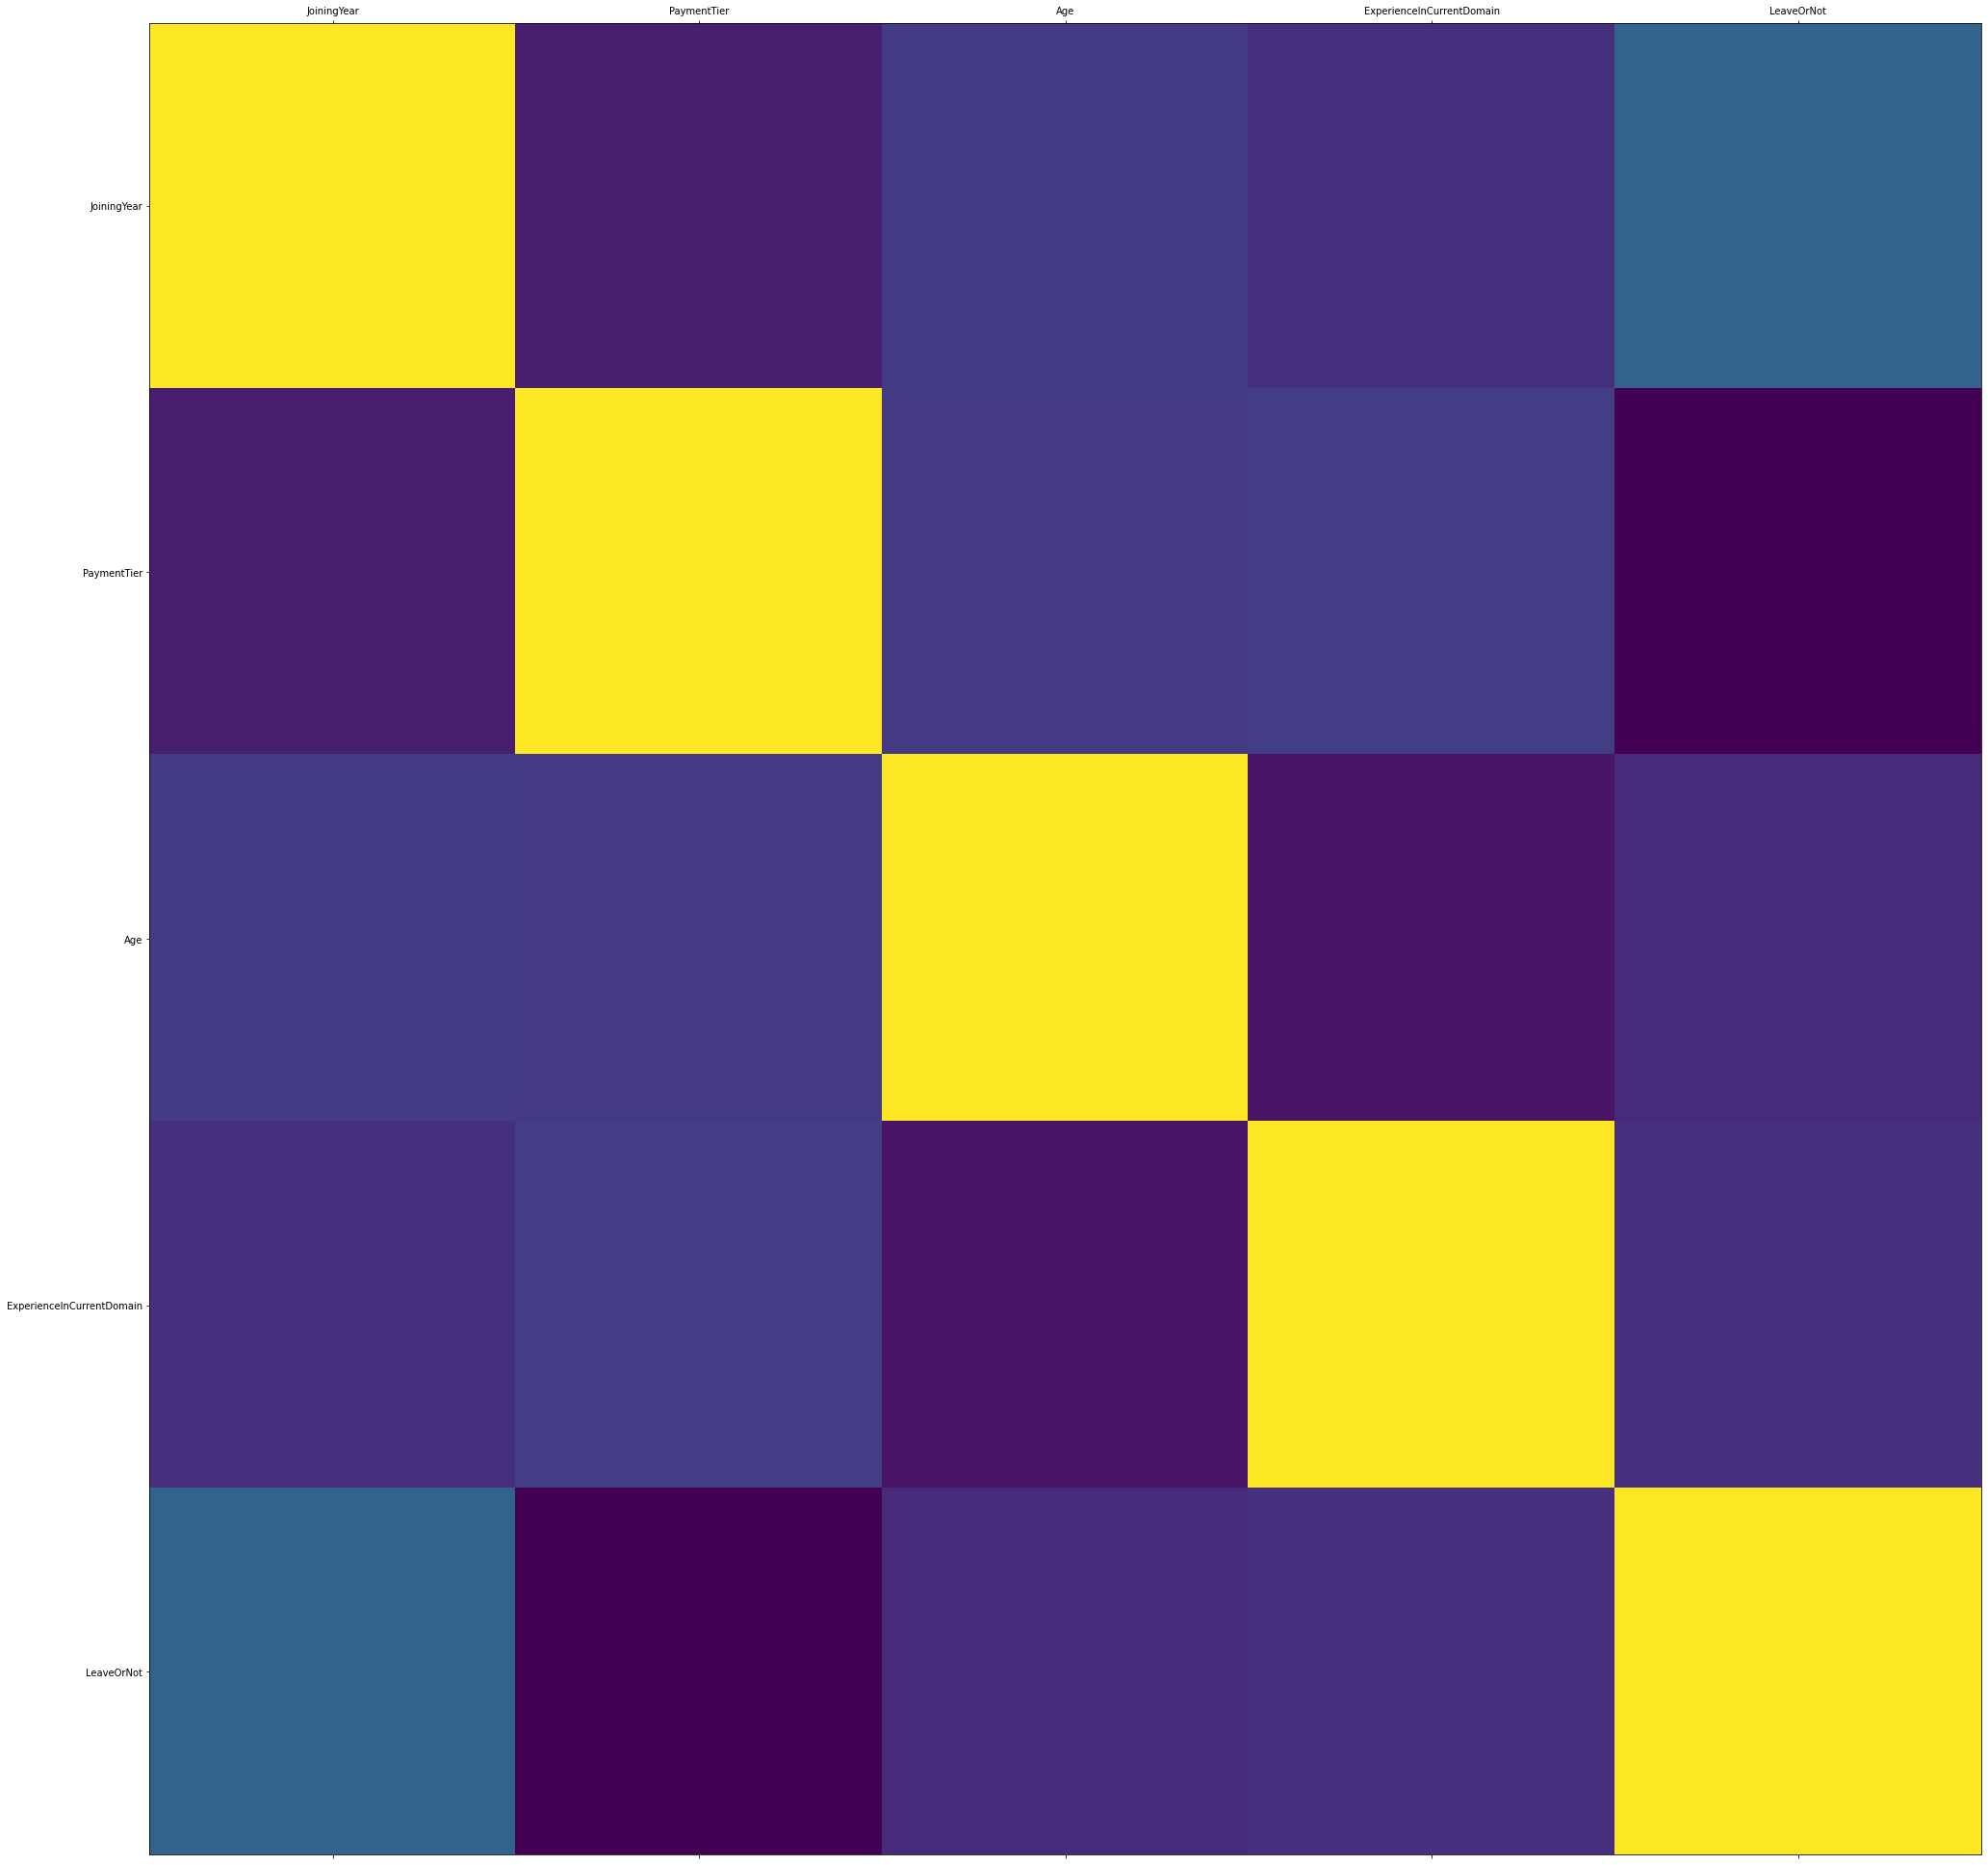

In [58]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_empregados)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [ ]:
from IPython.display import Image
Image('Treinamento.png')

In [59]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [60]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[2014    3   36    1]
 [2014    3   39    4]
 [2015    3   29    2]
 ...
 [2014    1   29    2]
 [2017    2   24    2]
 [2013    3   29    1]]
Conjunto de Validacao
[[2013    1   28    3]
 [2017    1   24    2]
 [2014    3   29    1]
 ...
 [2017    3   41    3]
 [2012    3   36    5]
 [2012    3   28    3]]
-----------------------


In [61]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_bikes.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_bikes.index)) * 100))

217.13% nos dados de treino
93.07% nos dados de teste


In [62]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [65]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [66]:
# Verificando os dados de treino
rf_predict_train = modelo_NB.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.6263


In [67]:
# Verificando nos dados de teste
rf_predict_test = modelo_NB.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.6189



In [70]:
from sklearn import metrics

In [71]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [74]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.6189

Classification Report
              precision    recall  f1-score   support

           1       0.44      0.21      0.29       503
           0       0.66      0.85      0.74       893

    accuracy                           0.62      1396
   macro avg       0.55      0.53      0.51      1396
weighted avg       0.58      0.62      0.58      1396



In [75]:
#Importação do pacote joblib
import joblib

In [77]:
# Persistência do modelo no arquivo modelo_empregados_MNB.pkl
joblib.dump(modelo_NB, 'modelo_empregados_Random.pkl')

['modelo_empregados_Random.pkl']

In [78]:
# Persistência do modelo no arquivo modelo_empregados_MNB.joblib
joblib.dump(modelo_NB, 'modelo_empregados_Random.joblib')

['modelo_empregados_Random.joblib']